# Preprocessing with NumPy


#### 1. Dealing with Missing Values
- **a. Finding Missing Values**
  - Method 1: Using `np.loadtxt()`
  - Method 2: Using `np.isnan()`

- **b. Temporarily Filling Missing Values**
  - Method 1: Fill with `0`
  - Method 2: Fill with `np.nanmax() + 1`

- **c. Substituting Missing Values**
  - Replace with `np.nanmean()` using `np.where()`

#### 2. Reshaping Arrays
- Using `np.reshape()`
- Using `np.transpose()`

#### 3. Removing Values
- Using `np.delete()`

#### 4. Sorting Data
- Using `np.sort()`
- Sorting with axis and slicing

#### 5. Argument Functions: Finding Indices
- `np.argsort()`
- `np.argwhere()`

#### 6. Shuffling Data
- Shuffling with `np.random.shuffle()`
- Shuffling with Random Generators

#### 7. Type Casting
- Changing data types using `astype()`

#### 8. Stripping Data
- Using `np.char.strip()` for text data

#### 9. Stacking Arrays
- Using `np.stack()`
- Using `np.vstack()`
- Using `np.hstack()`
- Using `np.dstack()`

#### 10. Concatenating Arrays
- Concatenate arrays along different axes

#### 11. Unique Values
- Using `np.unique()` to find unique elements
- Options: `return_counts`, `return_index`



In [1]:
import numpy as np

## 1. Dealing with Missing Values

### a) Finding missing values

#### Method 1: Use loadtxt()

In [2]:
# a) we can use loadtxt() to check for missing values:
# if np.loadtxt() compiles the dataset consists of only numeric values and has no missing data

lending_co_data_numeric = np.loadtxt("Lending-company-Numeric.csv", delimiter = ',')

#### Method 2: Use isnan()

In [3]:
# b) isnan() determines whether data is missing data for the individual elements in an array 
# (True -> Missing, False -> Not missing)

np.isnan(lending_co_data_numeric)


array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [4]:
# because False and True also have a numeric value: True = 1 and False = 0
# we can also easily check the total number of missing values in dataset by adding .sum()

np.isnan(lending_co_data_numeric).sum()

np.int64(0)

In [5]:
# introduce other dataset that does have missing values

lending_co_data_numeric_NAN = np.genfromtxt("Lending-company-Numeric-NAN.csv", delimiter = ';')

In [6]:
np.isnan(lending_co_data_numeric_NAN) # we see a True-value

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [ True, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [7]:
np.isnan(lending_co_data_numeric_NAN).sum() # 260 missing values in total

np.int64(260)

### 1b) Temporarily fill in missing values

Use genfromtxt() & 'filling_values' parameter

#### Method 1: set to = 0

In [8]:
# Filling_values substitutes every nan with the value we're passing (0 in this case)

lending_co_data_numeric_NAN = np.genfromtxt("Lending-company-Numeric-NAN.csv", 
                                            delimiter = ';',
                                            filling_values = 0)



In [9]:
# All the previously missing values are now 0s

np.isnan(lending_co_data_numeric_NAN).sum()



np.int64(0)

#### Method 2: set to = np.panmax + 1

In [10]:

# but this is not ideal, because 0 could be part of dataset and obscures difference between real '0's and fill in '0's
# better replace with values that certainly are not part of dataset; 
# later we can track them again and replace with an appropriate value
# a common way to do this: take a value that is higher than any value in dataset


# to do this: 
# 1) We need to reimport the dataset since all the missing values are filled up

lending_co_data_numeric_NAN = np.genfromtxt("Lending-company-Numeric-NAN.csv", 
                                            delimiter = ';') 



In [11]:
# 2) We use nanmax(), since max() returns nan. 

temporary_fill = np.nanmax(lending_co_data_numeric_NAN).round(2) + 1


In [12]:
temporary_fill

np.float64(64002.0)

In [13]:
lending_co_data_numeric_NAN = np.genfromtxt("Lending-company-Numeric-NAN.csv", 
                                            delimiter = ';',
                                            filling_values = temporary_fill) 

# Filling up all the missing values with the temporary filler. 

In [14]:
np.isnan(lending_co_data_numeric_NAN)

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [15]:
np.isnan(lending_co_data_numeric_NAN).sum() # we succesfully filled up missing values with temporary filler

np.int64(0)

### 1c) Substitute missing values

#### set to = np.nanmean() with np.where()

In [16]:
lending_co_data_numeric_NAN = np.genfromtxt("Lending-company-Numeric-NAN.csv", delimiter = ';')
lending_co_data_numeric_NAN

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [   nan,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [17]:
temporary_mean = np.nanmean(lending_co_data_numeric_NAN, axis = 0).round(2)

## Storing the means of every column. 

In [18]:
temporary_mean[0] # check mean of 1st column

np.float64(2250.25)

In [19]:
# we repeat what we did in 2.ii : temporarily fill in missing data with panmax +1

temporary_fill = np.nanmax(lending_co_data_numeric_NAN).round(2) + 1

lending_co_data_numeric_NAN = np.genfromtxt("Lending-company-Numeric-NAN.csv",
                                            delimiter = ';',
                                            filling_values = temporary_fill)

## Creating a unique filler and using it to take care of all the missing values.

In [20]:
temporary_fill

np.float64(64002.0)

In [21]:
np.mean(lending_co_data_numeric_NAN[:,0]).round(2) # Supposed mean (with new filled in values in place)
# an enormous difference with mean without filled in values

np.float64(4263.25)

In [22]:
# Going through the first column and substituting any temporary fillers 
# (previously missing) with the mean for that column with np.where()
# example for column 1 of dataset:

lending_co_data_numeric_NAN[:,0] = np.where(lending_co_data_numeric_NAN[:,0] == temporary_fill,
                                            temporary_mean[0], 
                                            lending_co_data_numeric_NAN[:,0])

# np.where(condition, if met, if not met)
# here: np.where current row = np.nanmax, 
# replace with np.nanmean() of column if the case, keep row as itself if not case 


In [23]:
# new mean of first column now equals old mean without missing values
# so this seems to work
# this method wants to minimize the impact of missing values on calculations (although it is not always valid)

np.mean(lending_co_data_numeric_NAN[:,0]).round(2)


np.float64(2250.25)

In [24]:
# As it seems to work, we apply this method to all columns in dataset 

for i in range(lending_co_data_numeric_NAN.shape[1]):        
    lending_co_data_numeric_NAN[:,i] = np.where(lending_co_data_numeric_NAN[:,i] == temporary_fill, 
                                                temporary_mean[i], 
                                                lending_co_data_numeric_NAN[:,i])
    


In [25]:
# We can use this approach for other applications as well (e.g. remove all negative values and set them to 0)
# or set them all to mode, or ... up to you as analyst

for i in range(lending_co_data_numeric_NAN.shape[1]):        
    lending_co_data_numeric_NAN[:,i] = np.where(lending_co_data_numeric_NAN[:, i] < 0,
                                                0, 
                                                lending_co_data_numeric_NAN[:,i])
    


## 2. Reshaping

    For certain computations manipulation of the shape of the arrays will be necessary

In [26]:
# load dataset

lending_co_data_numeric = np.loadtxt("Lending-company-Numeric.csv", delimiter = ',')

In [27]:
lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [28]:
lending_co_data_numeric.shape # 1043 rows, 6 columns

(1043, 6)

In [29]:
# We can reshape to array with 6 rows and 1043 columns: (1043,6)
# However: this is not a flipped/transposed array!
# Reshape has flattened array (one row after the other), 
# and has simply taken first 1043 values from that flattened array as the first row)
# and so on.. 
# we can see that the first and last three values in original and reshaped array are indeed the same

np.reshape(lending_co_data_numeric, (6,1043))



array([[ 2000.,    40.,   365., ...,   365.,  1581.,  3041.],
       [12277.,  2000.,    40., ...,    50.,   365.,  5350.],
       [ 6850., 15150.,  1000., ...,  2000.,    40.,   365.],
       [ 3101.,  4351., 16600., ..., 16600.,  2000.,    40.],
       [  365.,  3441.,  4661., ...,  8450., 22250.,  2000.],
       [   40.,   365.,  3701., ...,  4601.,  4601., 16600.]])

In [30]:
# If we want to transpose: use transpose() function

np.transpose(lending_co_data_numeric)

array([[ 2000.,  2000.,  1000., ...,  2000.,  1000.,  2000.],
       [   40.,    40.,    40., ...,    40.,    40.,    40.],
       [  365.,   365.,   365., ...,   365.,   365.,   365.],
       [ 3121.,  3061.,  2160., ...,  4201.,  2080.,  4601.],
       [ 4241.,  4171.,  3280., ...,  5001.,  3320.,  4601.],
       [13621., 15041., 15340., ..., 16600., 15600., 16600.]])

In [31]:
# even after transposing original array remains the same
# so save to different variable if you want to re-use transposed array

lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [32]:
# If we want to give different shape

np.reshape(lending_co_data_numeric, (3,500))

ValueError: cannot reshape array of size 6258 into shape (3,500)

In [33]:
# we cannot reshape array of size 6258 into shape (3,500)
# because the number of elements in original and reshaped array should be equal
# So we can choose whatever shape we wish 
# BUT the product of the dimensions must match the total number of elements in the array

np.reshape(lending_co_data_numeric, (1,1,2,3,1043))

# 1*1*2*3*1043 = 6258 elements, just like in original array

array([[[[[ 2000.,    40.,   365., ...,   365.,  1581.,  3041.],
          [12277.,  2000.,    40., ...,    50.,   365.,  5350.],
          [ 6850., 15150.,  1000., ...,  2000.,    40.,   365.]],

         [[ 3101.,  4351., 16600., ..., 16600.,  2000.,    40.],
          [  365.,  3441.,  4661., ...,  8450., 22250.,  2000.],
          [   40.,   365.,  3701., ...,  4601.,  4601., 16600.]]]]])

In [34]:
# reshaping does not alter original array
# original array stays the same

lending_co_data_numeric


array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [35]:
# therefore, store reshaped array if you want te use multiple times

lending_co_data_numeric_2 = np.reshape(lending_co_data_numeric, (6,1043))
lending_co_data_numeric_2

array([[ 2000.,    40.,   365., ...,   365.,  1581.,  3041.],
       [12277.,  2000.,    40., ...,    50.,   365.,  5350.],
       [ 6850., 15150.,  1000., ...,  2000.,    40.,   365.],
       [ 3101.,  4351., 16600., ..., 16600.,  2000.,    40.],
       [  365.,  3441.,  4661., ...,  8450., 22250.,  2000.],
       [   40.,   365.,  3701., ...,  4601.,  4601., 16600.]])

In [36]:
# Equivalent method

lending_co_data_numeric.reshape(6,1043)

array([[ 2000.,    40.,   365., ...,   365.,  1581.,  3041.],
       [12277.,  2000.,    40., ...,    50.,   365.,  5350.],
       [ 6850., 15150.,  1000., ...,  2000.,    40.,   365.],
       [ 3101.,  4351., 16600., ..., 16600.,  2000.,    40.],
       [  365.,  3441.,  4661., ...,  8450., 22250.,  2000.],
       [   40.,   365.,  3701., ...,  4601.,  4601., 16600.]])

In [37]:
lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

## 3. Removing Values

    Use np.delete() function

In [38]:
# import dataset

lending_co_data_numeric = np.loadtxt("Lending-company-Numeric.csv", delimiter = ',') 

In [39]:
lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [40]:
lending_co_data_numeric.size

6258

In [41]:
# Removes first single value of the flattened array

np.delete(lending_co_data_numeric, 0).shape

(6257,)

In [42]:
# as with transpose() and reshape() original array remains same

lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [43]:
# By setting an axis, we can simultaneously delete entire rows or columns

np.delete(lending_co_data_numeric, [0,2,4] , axis = 1)

array([[   40.,  3121., 13621.],
       [   40.,  3061., 15041.],
       [   40.,  2160., 15340.],
       ...,
       [   40.,  4201., 16600.],
       [   40.,  2080., 15600.],
       [   40.,  4601., 16600.]])

In [44]:
# We can simultaneously delete rows AND columns
# put np.delete() for axis 1 inside np.delete() for axis 0:

np.delete(np.delete(lending_co_data_numeric, [0,2,4] , axis = 1), [0,2,-1] , axis = 0)



array([[   40.,  3061., 15041.],
       [   40.,  3041., 15321.],
       [   50.,  3470., 13720.],
       ...,
       [   40.,  4240., 16600.],
       [   40.,  4201., 16600.],
       [   40.,  2080., 15600.]])

## 4. Sorting Data

In [45]:
# load dataset

lending_co_data_numeric = np.loadtxt("Lending-company-Numeric.csv", delimiter = ',') 
lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [46]:
lending_co_data_numeric.shape

(1043, 6)

In [47]:
# by default sorting occurs by axis = dimension - 1
# here we have a 2-D array so sorting happens along 2-1= 1, axis 1
# rearrange columns : each row is sorted from low to high

np.sort(lending_co_data_numeric)

array([[   40.,   365.,  2000.,  3121.,  4241., 13621.],
       [   40.,   365.,  2000.,  3061.,  4171., 15041.],
       [   40.,   365.,  1000.,  2160.,  3280., 15340.],
       ...,
       [   40.,   365.,  2000.,  4201.,  5001., 16600.],
       [   40.,   365.,  1000.,  2080.,  3320., 15600.],
       [   40.,   365.,  2000.,  4601.,  4601., 16600.]])

In [48]:
# shape remains the same: only values are put in different place

np.sort(lending_co_data_numeric).shape

(1043, 6)

In [49]:
# if we want to work with a flattened array: set axis to None

np.sort(lending_co_data_numeric, axis = None)

array([-2870., -2870., -2550., ..., 54625., 54625., 64001.])

In [50]:
# Adding 1 minus sign changes sign of every element: large values become small, & vice versa
# however: this array remains sorted in ascending order

np.sort(-lending_co_data_numeric)

array([[-13621.,  -4241.,  -3121.,  -2000.,   -365.,    -40.],
       [-15041.,  -4171.,  -3061.,  -2000.,   -365.,    -40.],
       [-15340.,  -3280.,  -2160.,  -1000.,   -365.,    -40.],
       ...,
       [-16600.,  -5001.,  -4201.,  -2000.,   -365.,    -40.],
       [-15600.,  -3320.,  -2080.,  -1000.,   -365.,    -40.],
       [-16600.,  -4601.,  -4601.,  -2000.,   -365.,    -40.]])

In [51]:
# Adding two minus signs sorts the array in descending order

-np.sort(-lending_co_data_numeric)

array([[13621.,  4241.,  3121.,  2000.,   365.,    40.],
       [15041.,  4171.,  3061.,  2000.,   365.,    40.],
       [15340.,  3280.,  2160.,  1000.,   365.,    40.],
       ...,
       [16600.,  5001.,  4201.,  2000.,   365.,    40.],
       [15600.,  3320.,  2080.,  1000.,   365.,    40.],
       [16600.,  4601.,  4601.,  2000.,   365.,    40.]])

In [52]:
# as with other functions reshape(), transpose(), delete() the original array remains same

lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [53]:
# The equivalent method, however, stores the values in place
# here original array is altered

lending_co_data_numeric.sort(axis = 0)
lending_co_data_numeric

array([[ 1.0000e+03,  3.5000e+01,  3.6500e+02, -2.8700e+03, -2.8700e+03,
        -3.5000e+02],
       [ 1.0000e+03,  3.5000e+01,  3.6500e+02, -2.5500e+03, -2.1000e+03,
         1.5000e+02],
       [ 1.0000e+03,  3.5000e+01,  3.6500e+02, -2.4500e+03, -2.0000e+03,
         1.1000e+03],
       ...,
       [ 9.0000e+03,  1.2500e+02,  3.6500e+02,  1.6751e+04,  1.8751e+04,
         5.4625e+04],
       [ 9.0000e+03,  1.6500e+02,  3.6500e+02,  1.7650e+04,  2.0001e+04,
         5.4625e+04],
       [ 9.0000e+03,  1.6500e+02,  3.6500e+02,  1.9001e+04,  2.2001e+04,
         6.4001e+04]])

In [54]:
np.set_printoptions(suppress=True) # simplifies scientific notation
lending_co_data_numeric # & indeed, are array now has been altered

array([[ 1000.,    35.,   365., -2870., -2870.,  -350.],
       [ 1000.,    35.,   365., -2550., -2100.,   150.],
       [ 1000.,    35.,   365., -2450., -2000.,  1100.],
       ...,
       [ 9000.,   125.,   365., 16751., 18751., 54625.],
       [ 9000.,   165.,   365., 17650., 20001., 54625.],
       [ 9000.,   165.,   365., 19001., 22001., 64001.]])

In [55]:
# we can also sort individual columns and rows by indexing

np.sort(lending_co_data_numeric[:,3]) # select only 3th column

array([-2870., -2550., -2450., ..., 16751., 17650., 19001.])

## 5. Argument Functions

Argument functions return information on the coordinates of elements within coordinate space,
i.e. information on indices of elements within rows and columns of dataset.

### np.argsort()

In [56]:
# import dataset

lending_co_data_numeric = np.loadtxt("Lending-company-Numeric.csv", delimiter = ',') 
lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [57]:
# Returns the order of indices of sorted values of array

np.argsort(lending_co_data_numeric)

array([[1, 2, 0, 3, 4, 5],
       [1, 2, 0, 3, 4, 5],
       [1, 2, 0, 3, 4, 5],
       ...,
       [1, 2, 0, 3, 4, 5],
       [1, 2, 0, 3, 4, 5],
       [1, 2, 0, 3, 4, 5]])

In [58]:
# we can also sort by axis

np.argsort(lending_co_data_numeric, axis = 0)

array([[ 537,  443,    0,   32,   32,  482],
       [ 639,  327,  687,  166,  166,  493],
       [ 849,  432,  688,   85,   85,  166],
       ...,
       [  27,  326,  355,  568, 1019,  568],
       [ 277,   27,  357,  718, 1033,  534],
       [ 420,  408, 1042,  912,  912,   27]])

In [59]:
# in column 5 value at row 482 would be the lowest value
# the value of this element is -350

lending_co_data_numeric[482,5]

np.float64(-350.0)

In [60]:
# we can check whether this smallest element by sorting array by rows:
# - 350 is indeed lowest value in column 5

np.sort(lending_co_data_numeric, axis = 0)

array([[ 1000.,    35.,   365., -2870., -2870.,  -350.],
       [ 1000.,    35.,   365., -2550., -2100.,   150.],
       [ 1000.,    35.,   365., -2450., -2000.,  1100.],
       ...,
       [ 9000.,   125.,   365., 16751., 18751., 54625.],
       [ 9000.,   165.,   365., 17650., 20001., 54625.],
       [ 9000.,   165.,   365., 19001., 22001., 64001.]])

In [61]:
# we can sort an individual column

np.argsort(lending_co_data_numeric[:,0])

array([537, 639, 849, ...,  27, 277, 420])

In [62]:
# We can now sort whole the array by this first column

lending_co_data_numeric = lending_co_data_numeric[np.argsort(lending_co_data_numeric[:,0])]
lending_co_data_numeric

# and we see that values in first column are sorted, but not the values in the other columns,
# so correct

array([[ 1000.,    40.,   365.,  2200.,  3400., 15600.],
       [ 1000.,    40.,   365.,  2200.,  3800., 15600.],
       [ 1000.,    40.,   365.,  2000.,  3950., 15600.],
       ...,
       [ 9000.,   165.,   365., 14501., 16846., 64001.],
       [ 9000.,   125.,   365., 12001., 15751., 38626.],
       [ 9000.,   125.,   365., 12251., 14251., 25626.]])

In [63]:
# Contrary to other methods, this method doesn't sort in place

lending_co_data_numeric.argsort(axis = 0)

array([[   0,   22,    0,  199,  199,  172],
       [ 155,   62,  687,   53,   53,  160],
       [ 156,   38,  688,  169,  169,   53],
       ...,
       [1022, 1042,  355, 1024, 1037, 1023],
       [1031, 1039,  357,  941, 1029, 1024],
       [1042, 1040, 1042, 1027, 1027, 1040]])

In [64]:
lending_co_data_numeric

array([[ 1000.,    40.,   365.,  2200.,  3400., 15600.],
       [ 1000.,    40.,   365.,  2200.,  3800., 15600.],
       [ 1000.,    40.,   365.,  2000.,  3950., 15600.],
       ...,
       [ 9000.,   165.,   365., 14501., 16846., 64001.],
       [ 9000.,   125.,   365., 12001., 15751., 38626.],
       [ 9000.,   125.,   365., 12251., 14251., 25626.]])

### np.argwhere()

In [65]:
# load dataset

lending_co_data_numeric = np.loadtxt("Lending-company-Numeric.csv", delimiter = ',') 
lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [66]:
# checks whether individual elements satisfy a condition
# outputs coordinates of each element that satisfies condition
# with row index in 1st & columnn index in 2nd column

np.argwhere(lending_co_data_numeric)

array([[   0,    0],
       [   0,    1],
       [   0,    2],
       ...,
       [1042,    3],
       [1042,    4],
       [1042,    5]])

In [67]:
# But: we did not specify any condition?
# default condition = return values different from 0

# if we reverse that condition, we get:

np.argwhere(lending_co_data_numeric == False)


array([[116,   4],
       [430,   3]])

In [68]:
# this result suggests there are only 2 rows in dataset with 0 - values
# to check whether this is correct, we can print the values of both rows

print(lending_co_data_numeric[116])
print(lending_co_data_numeric[430])

# and indeed, they hold zero values in the specified columns

[ 1000.    50.   365. -1450.     0. 13850.]
[1000.   50.  365.    0.  550. 5650.]


In [69]:
# The condition can be more complex: >, <, even, uneven

np.argwhere(lending_co_data_numeric %2 == 0)

# we can use function to separate elements that interest us
# and only examine those


# Similar to 'filtering' on the basis of conditional slicing
# difference: 
# slicing gives us actual values of elements 
# <--> np.argwhere() gives us coordinates of elements


array([[   0,    0],
       [   0,    1],
       [   1,    0],
       ...,
       [1042,    0],
       [1042,    1],
       [1042,    5]])

In [70]:
# if we want to know where to find certain values in dataset
# we can use this function
# for example: find missing values

np.isnan(lending_co_data_numeric).sum()

# in the current dataset no missing values

np.int64(0)

In [71]:
# so we load another dataset with missing values, so we can illustrate this

lending_co_data_numeric_NAN = np.genfromtxt("Lending-company-Numeric-NAN.csv", delimiter = ';') 
lending_co_data_numeric_NAN

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [   nan,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [72]:
# np.isnan returns boolean for every element; True = 1; False = 0

np.isnan(lending_co_data_numeric_NAN)

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [ True, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [73]:
# If we now take this as the condition/the argument
# for our np.where function, we get indices of all missing values

np.argwhere(np.isnan(lending_co_data_numeric_NAN))

array([[  11,    3],
       [  15,    3],
       [  27,    3],
       [  58,    3],
       [  60,    4],
       [  85,    4],
       [ 117,    5],
       [ 152,    1],
       [ 152,    2],
       [ 152,    4],
       [ 172,    1],
       [ 175,    1],
       [ 175,    2],
       [ 176,    3],
       [ 177,    4],
       [ 178,    5],
       [ 211,    3],
       [ 229,    0],
       [ 230,    1],
       [ 237,    1],
       [ 247,    3],
       [ 251,    5],
       [ 252,    4],
       [ 258,    1],
       [ 260,    3],
       [ 262,    4],
       [ 271,    5],
       [ 272,    4],
       [ 284,    2],
       [ 284,    3],
       [ 297,    1],
       [ 297,    2],
       [ 300,    3],
       [ 315,    3],
       [ 315,    5],
       [ 327,    4],
       [ 336,    4],
       [ 343,    0],
       [ 344,    2],
       [ 346,    2],
       [ 363,    3],
       [ 375,    3],
       [ 377,    2],
       [ 398,    5],
       [ 416,    4],
       [ 428,    0],
       [ 432,    1],
       [ 433,

In [74]:
# checking the values on the indices confirms there are missing values

lending_co_data_numeric_NAN[175]

array([ 2000.,    nan,    nan,  1851.,  3051., 13561.])

In [75]:
# and by going through the coordinates of all the mising values of the array, 
# we can easily fill them up:

for array_index in np.argwhere(np.isnan(lending_co_data_numeric_NAN)):
    lending_co_data_numeric_NAN[array_index[0], array_index[1]] = 0



In [76]:
# and indeed: the nan on indices 1 and 2 are replaced with '0'

lending_co_data_numeric_NAN[175]

array([ 2000.,     0.,     0.,  1851.,  3051., 13561.])

In [77]:
# and there are no missing values left in dataset

np.isnan(lending_co_data_numeric_NAN).sum()

np.int64(0)

## 6. Shuffling Data

Randomly rearrange dataset so that random sample would be representative of entire dataset. Rows in dataset as cards in deck of cards that get shufled. Entire row is moved up or down in dataset, but contents of each row remains unchanged.

In [78]:
# to illustrate in first instance, we load only first 8 rows of dataset

lending_co_data_numeric = np.loadtxt("Lending-company-Numeric.csv", delimiter = ',')[:8]
lending_co_data_numeric


array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       [ 2000.,    40.,   365.,  3041.,  4241., 15321.],
       [ 2000.,    50.,   365.,  3470.,  4820., 13720.],
       [ 2000.,    40.,   365.,  3201.,  4141., 14141.],
       [ 2000.,    50.,   365.,  1851.,  3251., 17701.],
       [ 2000.,    40.,   365.,  3971.,  4131., 15351.]])

### 6.1. With np.shuffle()

In [79]:
# 1st way to sfuffle

# Shuffles the array and changes in place

np.random.shuffle(lending_co_data_numeric)

In [80]:
lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3971.,  4131., 15351.],
       [ 2000.,    50.,   365.,  1851.,  3251., 17701.],
       [ 2000.,    50.,   365.,  3470.,  4820., 13720.],
       [ 2000.,    40.,   365.,  3041.,  4241., 15321.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 2000.,    40.,   365.,  3201.,  4141., 14141.],
       [ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.]])

In [81]:
# We can shuffle the array as many times as we wish 

np.random.shuffle(lending_co_data_numeric)
lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3041.,  4241., 15321.],
       [ 2000.,    50.,   365.,  3470.,  4820., 13720.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       [ 2000.,    40.,   365.,  3201.,  4141., 14141.],
       [ 2000.,    50.,   365.,  1851.,  3251., 17701.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 2000.,    40.,   365.,  3971.,  4131., 15351.]])

In [82]:
# Now, let's load entire dataset and apply function to entire dataset

lending_co_data_numeric = np.loadtxt("Lending-company-Numeric.csv", delimiter = ',')
lending_co_data_numeric



array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [83]:
# We can import functions we use multiple times for convenience

from numpy.random import shuffle

In [84]:
shuffle(lending_co_data_numeric)
lending_co_data_numeric

# We write shuffle() instead of numpy.random.shuffle() since we imported the function earlier. 

array([[ 2000.,    40.,   365.,  3101.,  4251., 16600.],
       [ 1000.,    50.,   365., -1800.,  -350., 12900.],
       [ 1000.,    40.,   365.,  2120.,  3280., 15600.],
       ...,
       [ 2000.,    50.,   365.,  5951.,  7551., 20250.],
       [ 1000.,    40.,   365.,  6800.,  7600., 15600.],
       [ 1000.,    50.,   365.,  1450.,  2750., 17200.]])

### 6.2. With random generator

In [85]:
from numpy.random import Generator as gen
from numpy.random import PCG64 as pcg

# Random generators can be used for shuffling. 

In [86]:
array_RG = gen(pcg(seed = 365))
array_RG.shuffle(lending_co_data_numeric)
lending_co_data_numeric

# Seeds don't work for shuffling (and it's intended).

array([[ 4000.,    50.,   365.,  5500.,  7010., 17632.],
       [ 1000.,    40.,   365.,  5800.,  5800., 15600.],
       [ 2500.,    50.,   365.,  3250.,  4250., 20750.],
       ...,
       [ 1000.,    40.,   365.,  2200.,  3400., 15600.],
       [ 4000.,    50.,   365.,  5450.,  6950., 21750.],
       [ 4000.,    50.,   365.,  5400.,  6750., 22250.]])

## 7. Type Casting

Take object with values of certain datatype &
create object with identical values of different datatype.

With astype() = assign type

Ex: change float to integer 

In [87]:
# load dataset

lending_co_data_numeric = np.loadtxt("Lending-company-Numeric.csv", delimiter = ',') 
lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [88]:
# Typecast float -> integer : OK

lending_co_data_numeric.astype(dtype = np.int32)

array([[ 2000,    40,   365,  3121,  4241, 13621],
       [ 2000,    40,   365,  3061,  4171, 15041],
       [ 1000,    40,   365,  2160,  3280, 15340],
       ...,
       [ 2000,    40,   365,  4201,  5001, 16600],
       [ 1000,    40,   365,  2080,  3320, 15600],
       [ 2000,    40,   365,  4601,  4601, 16600]], dtype=int32)

In [89]:
# astype() does not change values in place

lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [90]:
# Typecast integer -> str : NOT OK

lending_co_data_numeric.astype(dtype = np.int32).astype(dtype = np.str_)

array([['2000', '40', '365', '3121', '4241', '13621'],
       ['2000', '40', '365', '3061', '4171', '15041'],
       ['1000', '40', '365', '2160', '3280', '15340'],
       ...,
       ['2000', '40', '365', '4201', '5001', '16600'],
       ['1000', '40', '365', '2080', '3320', '15600'],
       ['2000', '40', '365', '4601', '4601', '16600']], dtype='<U11')

In [91]:
# Typecast float -> str : OK
# overwrite variable

lending_co_data_numeric = lending_co_data_numeric.astype(dtype = np.str_)

In [92]:
lending_co_data_numeric

array([['2000.0', '40.0', '365.0', '3121.0', '4241.0', '13621.0'],
       ['2000.0', '40.0', '365.0', '3061.0', '4171.0', '15041.0'],
       ['1000.0', '40.0', '365.0', '2160.0', '3280.0', '15340.0'],
       ...,
       ['2000.0', '40.0', '365.0', '4201.0', '5001.0', '16600.0'],
       ['1000.0', '40.0', '365.0', '2080.0', '3320.0', '15600.0'],
       ['2000.0', '40.0', '365.0', '4601.0', '4601.0', '16600.0']],
      dtype='<U32')

In [93]:
# Typecast str -> int: NOT OK

lending_co_data_numeric.astype(dtype = np.int32)

ValueError: invalid literal for int() with base 10: np.str_('2000.0')

In [94]:
# So only possible if we go through floats: string -> float -> integer
# or:                                       string <- float <- integer

lending_co_data_numeric = lending_co_data_numeric.astype(dtype = np.float32)
lending_co_data_numeric.astype(dtype = np.int32)

array([[ 2000,    40,   365,  3121,  4241, 13621],
       [ 2000,    40,   365,  3061,  4171, 15041],
       [ 1000,    40,   365,  2160,  3280, 15340],
       ...,
       [ 2000,    40,   365,  4201,  5001, 16600],
       [ 1000,    40,   365,  2080,  3320, 15600],
       [ 2000,    40,   365,  4601,  4601, 16600]], dtype=int32)

In [95]:
# We can chain methods in NumPy

lending_co_data_numeric.astype(dtype = np.float32).astype(dtype = np.int32)

array([[ 2000,    40,   365,  3121,  4241, 13621],
       [ 2000,    40,   365,  3061,  4171, 15041],
       [ 1000,    40,   365,  2160,  3280, 15340],
       ...,
       [ 2000,    40,   365,  4201,  5001, 16600],
       [ 1000,    40,   365,  2080,  3320, 15600],
       [ 2000,    40,   365,  4601,  4601, 16600]], dtype=int32)

## 8. Stripping Data

### np.char.strip()

remove excess parts of string data

In [96]:
# load dataset
# only load text data in columns with index 1,2,4

lending_co_total_price = np.genfromtxt("Lending-Company-Total-Price.csv",
                                       delimiter = ',',
                                       dtype = np.str_,
                                       skip_header = 1, 
                                       usecols = [1,2,4])
lending_co_total_price



array([['id_1', 'Product B', 'Location 2'],
       ['id_2', 'Product B', 'Location 3'],
       ['id_3', 'Product C', 'Location 5'],
       ...,
       ['id_413', 'Product B', 'Location 135'],
       ['id_414', 'Product C', 'Location 200'],
       ['id_415', 'Product A', 'Location 8']], dtype='<U12')

In [97]:
# Remove "id_" from the 1st column,
# as well as "Product " from the second column,
# and "Location " from the third one. 

lending_co_total_price[:,0] = np.char.strip(lending_co_total_price[:,0], "id_")
lending_co_total_price[:,1] = np.char.strip(lending_co_total_price[:,1], "Product ")
lending_co_total_price[:,2] = np.char.strip(lending_co_total_price[:,2], "Location ")
lending_co_total_price

array([['1', 'B', '2'],
       ['2', 'B', '3'],
       ['3', 'C', '5'],
       ...,
       ['413', 'B', '135'],
       ['414', 'C', '200'],
       ['415', 'A', '8']], dtype='<U12')

In [98]:
# We can combine stripping with substituting to transform all the letters in numbers

lending_co_total_price[:,1] = np.where(lending_co_total_price[:,1] == 'A', '1', lending_co_total_price[:,1]) 
lending_co_total_price[:,1] = np.where(lending_co_total_price[:,1] == 'B', '2', lending_co_total_price[:,1]) 
lending_co_total_price[:,1] = np.where(lending_co_total_price[:,1] == 'C', '3', lending_co_total_price[:,1]) 
lending_co_total_price[:,1] = np.where(lending_co_total_price[:,1] == 'D', '4', lending_co_total_price[:,1]) 
lending_co_total_price[:,1] = np.where(lending_co_total_price[:,1] == 'E', '5', lending_co_total_price[:,1]) 
lending_co_total_price[:,1] = np.where(lending_co_total_price[:,1] == 'F', '6', lending_co_total_price[:,1]) 

lending_co_total_price

array([['1', '2', '2'],
       ['2', '2', '3'],
       ['3', '3', '5'],
       ...,
       ['413', '2', '135'],
       ['414', '3', '200'],
       ['415', '1', '8']], dtype='<U12')

In [99]:
# Even though the values look like numbers, they're actually just text, so we need to cast them once again. 

lending_co_total_price = lending_co_total_price.astype(dtype = np.int32)
lending_co_total_price



array([[  1,   2,   2],
       [  2,   2,   3],
       [  3,   3,   5],
       ...,
       [413,   2, 135],
       [414,   3, 200],
       [415,   1,   8]], dtype=int32)

## 9. Stacking

    placing multiple arrays of matching shapes on top of another
    to create larger array

    9.1. np.stack(): stack along specified axis 
    9.2. np.vstack(): vertical stack
    9.3. np.hstack(): horizontal stack
    9.4. np.dstack(): depth stack
   

In [100]:
# load dataset

# dataset 1: no nan

lending_co_data_numeric = np.loadtxt("Lending-company-Numeric.csv", delimiter = ',') 
lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [101]:
# dataset 2: with nan

# Recall
# We create a filler, reimport and fill all the nan-s, 
# then subsitute all the temporary fillers with more appropriate values

lending_co_data_numeric_NAN = np.genfromtxt("Lending-company-Numeric-NAN.csv", delimiter = ';')

temporary_fill = np.nanmax(lending_co_data_numeric_NAN).round(2) + 1
temporary_mean = np.nanmean(lending_co_data_numeric_NAN, axis = 0).round(2)

lending_co_data_numeric_NAN = np.genfromtxt("Lending-company-Numeric-NAN.csv", 
                                            delimiter = ';', 
                                            filling_values = temporary_fill)

for i in range(lending_co_data_numeric_NAN.shape[1]):
    lending_co_data_numeric_NAN[:,i] = np.where(lending_co_data_numeric_NAN[:,i] == temporary_fill,
                                                temporary_mean[i],
                                                lending_co_data_numeric_NAN[:,i])
lending_co_data_numeric_NAN




array([[ 2000.  ,    40.  ,   365.  ,  3121.  ,  4241.  , 13621.  ],
       [ 2000.  ,    40.  ,   365.  ,  3061.  ,  4171.  , 15041.  ],
       [ 1000.  ,    40.  ,   365.  ,  2160.  ,  3280.  , 15340.  ],
       ...,
       [ 2250.25,    40.  ,   365.  ,  4201.  ,  5001.  , 16600.  ],
       [ 1000.  ,    40.  ,   365.  ,  2080.  ,  3320.  , 15600.  ],
       [ 2000.  ,    40.  ,   365.  ,  4601.  ,  4601.  , 16600.  ]])

### 9.1. np.stack()


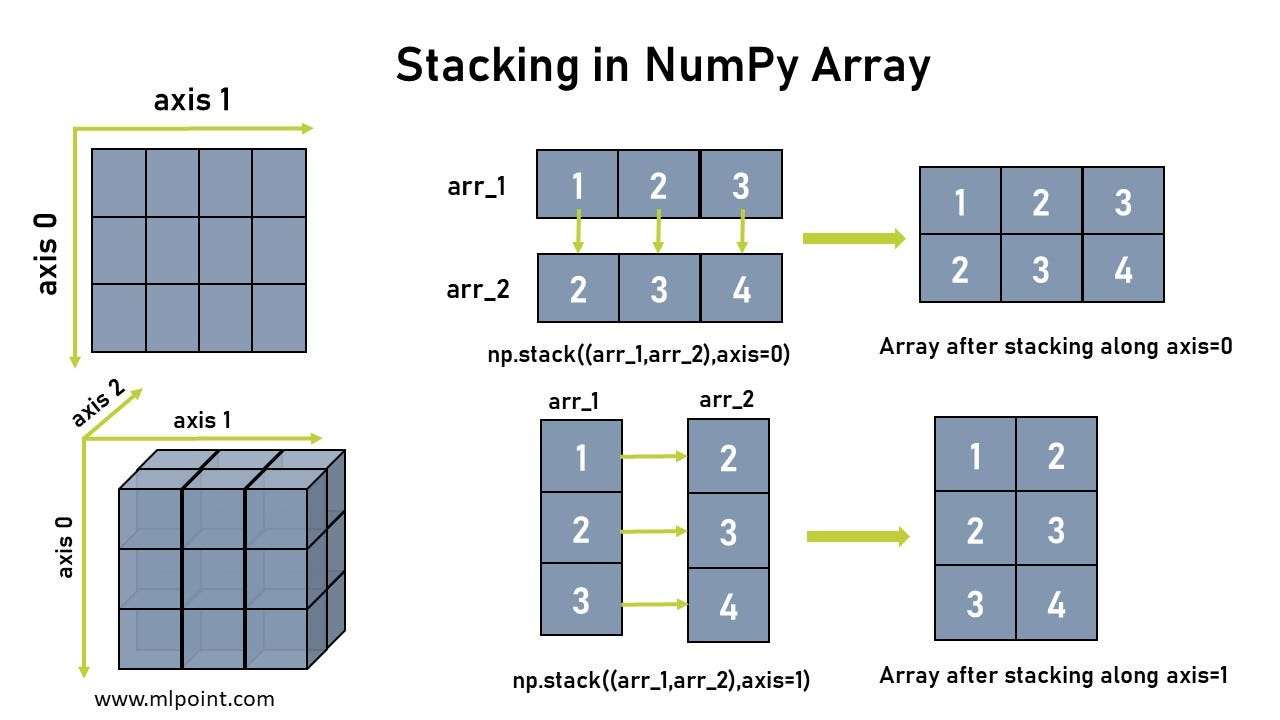

    Source: https://medium.com/mlpoint/numpy-for-machine-learning-211a3e58b574

In [102]:
# stacking the first 2 columns on top of each other

np.stack((lending_co_data_numeric[:,1],lending_co_data_numeric[:,0]))

array([[  40.,   40.,   40., ...,   40.,   40.,   40.],
       [2000., 2000., 1000., ..., 2000., 1000., 2000.]])

In [103]:
# We can stack them in any order we like: first mentioned array comes on top

np.stack((lending_co_data_numeric[:,0],lending_co_data_numeric[:,1])) 

array([[2000., 2000., 1000., ..., 2000., 1000., 2000.],
       [  40.,   40.,   40., ...,   40.,   40.,   40.]])

In [104]:
# comparable output as transposing only the first two columns

np.transpose(lending_co_data_numeric[:,:2])

array([[2000., 2000., 1000., ..., 2000., 1000., 2000.],
       [  40.,   40.,   40., ...,   40.,   40.,   40.]])

In [105]:
# we can also put them side by side instead of on top of each other
# by setting axis parameter to 1

np.stack((lending_co_data_numeric[:,0],lending_co_data_numeric[:,1]), axis = 1) 

array([[2000.,   40.],
       [2000.,   40.],
       [1000.,   40.],
       ...,
       [2000.,   40.],
       [1000.,   40.],
       [2000.,   40.]])

In [106]:
# we can stack more than 2 arrays

np.stack((lending_co_data_numeric[:,0],lending_co_data_numeric[:,1], lending_co_data_numeric[:,2]), axis = 1)

array([[2000.,   40.,  365.],
       [2000.,   40.,  365.],
       [1000.,   40.,  365.],
       ...,
       [2000.,   40.,  365.],
       [1000.,   40.,  365.],
       [2000.,   40.,  365.]])

In [107]:
# however to stack arrays must have same shape 
# we change last array to width of 2 columns, while first 2 arrays keep width of 1 column

np.stack((lending_co_data_numeric[:,0],lending_co_data_numeric[:,1], lending_co_data_numeric[:,:2]), axis = 1)

# this returns a value error

ValueError: all input arrays must have the same shape

### 9.2. np.vstack()

    v stack = vertical stack
    place first array vertically on top of other array
    results in a 'long' array
    
    
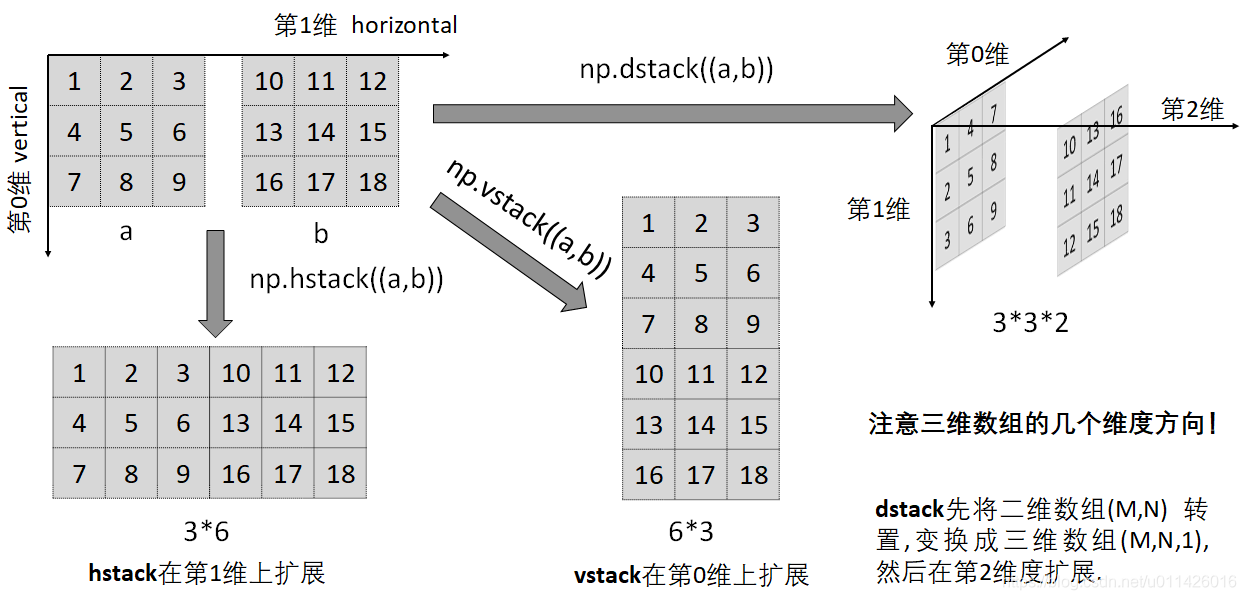
     
     Source: https://blog.csdn.net/wzy628810/article/details/103840261


In [108]:
# both datasets we loaded have same shape, so we can stack them

print(lending_co_data_numeric.shape, lending_co_data_numeric_NAN.shape)

(1043, 6) (1043, 6)


In [109]:
np.vstack((lending_co_data_numeric, lending_co_data_numeric_NAN))

array([[ 2000.  ,    40.  ,   365.  ,  3121.  ,  4241.  , 13621.  ],
       [ 2000.  ,    40.  ,   365.  ,  3061.  ,  4171.  , 15041.  ],
       [ 1000.  ,    40.  ,   365.  ,  2160.  ,  3280.  , 15340.  ],
       ...,
       [ 2250.25,    40.  ,   365.  ,  4201.  ,  5001.  , 16600.  ],
       [ 1000.  ,    40.  ,   365.  ,  2080.  ,  3320.  , 15600.  ],
       [ 2000.  ,    40.  ,   365.  ,  4601.  ,  4601.  , 16600.  ]])

In [110]:
# visually the output does not allow us to see that the datasets are vertically stacked
# but we know that each of them contains 1043 rows
# and when we call the .shape attribute we see that the new array has indeed 2x1043 = 2086 rows

np.vstack((lending_co_data_numeric, lending_co_data_numeric_NAN)).shape

(2086, 6)

### 9.3. np.hstack()

    h stack = horizontal stack
    place first array horizontally next to other array
    results in a 'wider' array

In [111]:
np.hstack((lending_co_data_numeric, lending_co_data_numeric_NAN)) 

array([[ 2000.,    40.,   365., ...,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365., ...,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365., ...,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365., ...,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365., ...,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365., ...,  4601.,  4601., 16600.]])

In [112]:
# again, when calling the .shape attribute we can see that the
# new array has 2x6 = 12 columns

np.hstack((lending_co_data_numeric, lending_co_data_numeric_NAN)).shape

(1043, 12)

### 9.4. np.dstack()

    d stack = depth stack
    stack arrays in an extra dimension
    results in array of a higher dimension

In [113]:
np.dstack((lending_co_data_numeric, lending_co_data_numeric_NAN)) 

array([[[ 2000.  ,  2000.  ],
        [   40.  ,    40.  ],
        [  365.  ,   365.  ],
        [ 3121.  ,  3121.  ],
        [ 4241.  ,  4241.  ],
        [13621.  , 13621.  ]],

       [[ 2000.  ,  2000.  ],
        [   40.  ,    40.  ],
        [  365.  ,   365.  ],
        [ 3061.  ,  3061.  ],
        [ 4171.  ,  4171.  ],
        [15041.  , 15041.  ]],

       [[ 1000.  ,  1000.  ],
        [   40.  ,    40.  ],
        [  365.  ,   365.  ],
        [ 2160.  ,  2160.  ],
        [ 3280.  ,  3280.  ],
        [15340.  , 15340.  ]],

       ...,

       [[ 2000.  ,  2250.25],
        [   40.  ,    40.  ],
        [  365.  ,   365.  ],
        [ 4201.  ,  4201.  ],
        [ 5001.  ,  5001.  ],
        [16600.  , 16600.  ]],

       [[ 1000.  ,  1000.  ],
        [   40.  ,    40.  ],
        [  365.  ,   365.  ],
        [ 2080.  ,  2080.  ],
        [ 3320.  ,  3320.  ],
        [15600.  , 15600.  ]],

       [[ 2000.  ,  2000.  ],
        [   40.  ,    40.  ],
        [  365.  

In [114]:
# we have 3-D array consisting of multiple (6,2) arrays

np.dstack((lending_co_data_numeric, lending_co_data_numeric_NAN)).shape 

(1043, 6, 2)

In [115]:
# think of dimensions as: first element is row, second column, third original array
# isolate first dimension: represents row

np.dstack((lending_co_data_numeric, lending_co_data_numeric_NAN))[0]

# each column contains first row of a dataset, and first rows of both datasets are stacked together

array([[ 2000.,  2000.],
       [   40.,    40.],
       [  365.,   365.],
       [ 3121.,  3121.],
       [ 4241.,  4241.],
       [13621., 13621.]])

In [116]:
# isolate second dimension: refers to the columns of either input array

np.dstack((lending_co_data_numeric, lending_co_data_numeric_NAN))[0,0]

array([2000., 2000.])

In [117]:
# isolate third dimension: slice all columns with row index 0 and depth index 0

np.dstack((lending_co_data_numeric, lending_co_data_numeric_NAN))[0,:,0]

# we see the data of first row from only 1 array
# this third dimension refers to the oroginal array the data come from

array([ 2000.,    40.,   365.,  3121.,  4241., 13621.])

In [118]:
# with np.stack we can get same output if we set axis = -1
# a stack function returns an output that is exactly 1 dimension more than its inputs


np.stack((lending_co_data_numeric, lending_co_data_numeric_NAN), axis = -1)



array([[[ 2000.  ,  2000.  ],
        [   40.  ,    40.  ],
        [  365.  ,   365.  ],
        [ 3121.  ,  3121.  ],
        [ 4241.  ,  4241.  ],
        [13621.  , 13621.  ]],

       [[ 2000.  ,  2000.  ],
        [   40.  ,    40.  ],
        [  365.  ,   365.  ],
        [ 3061.  ,  3061.  ],
        [ 4171.  ,  4171.  ],
        [15041.  , 15041.  ]],

       [[ 1000.  ,  1000.  ],
        [   40.  ,    40.  ],
        [  365.  ,   365.  ],
        [ 2160.  ,  2160.  ],
        [ 3280.  ,  3280.  ],
        [15340.  , 15340.  ]],

       ...,

       [[ 2000.  ,  2250.25],
        [   40.  ,    40.  ],
        [  365.  ,   365.  ],
        [ 4201.  ,  4201.  ],
        [ 5001.  ,  5001.  ],
        [16600.  , 16600.  ]],

       [[ 1000.  ,  1000.  ],
        [   40.  ,    40.  ],
        [  365.  ,   365.  ],
        [ 2080.  ,  2080.  ],
        [ 3320.  ,  3320.  ],
        [15600.  , 15600.  ]],

       [[ 2000.  ,  2000.  ],
        [   40.  ,    40.  ],
        [  365.  

In [119]:
# only in 1-D and 2-D arrays do np.stack and np.dstack give the same output
# for higher dimensional arrays this is no longer the case
# We reate 2 3-D arrays to showcase how dstack works for higher dimensions, to illustrate this:

array_example_1 = np.array([[[1,2,3,4],[5,6,7,8],[9,10,11,12]],[[21,22,23,24],[25,26,27,28],[29,30,31,32]]])
array_example_2 = array_example_1 * 2


In [120]:
# now we call dstack

np.dstack((array_example_1, array_example_2))

array([[[ 1,  2,  3,  4,  2,  4,  6,  8],
        [ 5,  6,  7,  8, 10, 12, 14, 16],
        [ 9, 10, 11, 12, 18, 20, 22, 24]],

       [[21, 22, 23, 24, 42, 44, 46, 48],
        [25, 26, 27, 28, 50, 52, 54, 56],
        [29, 30, 31, 32, 58, 60, 62, 64]]])

In [121]:
# as well as stack

np.stack((array_example_1, array_example_2), axis = -1)

array([[[[ 1,  2],
         [ 2,  4],
         [ 3,  6],
         [ 4,  8]],

        [[ 5, 10],
         [ 6, 12],
         [ 7, 14],
         [ 8, 16]],

        [[ 9, 18],
         [10, 20],
         [11, 22],
         [12, 24]]],


       [[[21, 42],
         [22, 44],
         [23, 46],
         [24, 48]],

        [[25, 50],
         [26, 52],
         [27, 54],
         [28, 56]],

        [[29, 58],
         [30, 60],
         [31, 62],
         [32, 64]]]])

In [122]:
# and we see we get different outcomes
# we can verify this by calling the .shape attribute again

print(np.dstack((array_example_1, array_example_2)).shape)
print(np.stack((array_example_1, array_example_2), axis = -1).shape)

(2, 3, 8)
(2, 3, 4, 2)


## 10. Concatenate

    link together arrays in a chain along a given axis
    inputs and outputs of concatenate() function have same nr of dimensions
    (which makes it different from stack)
    
    
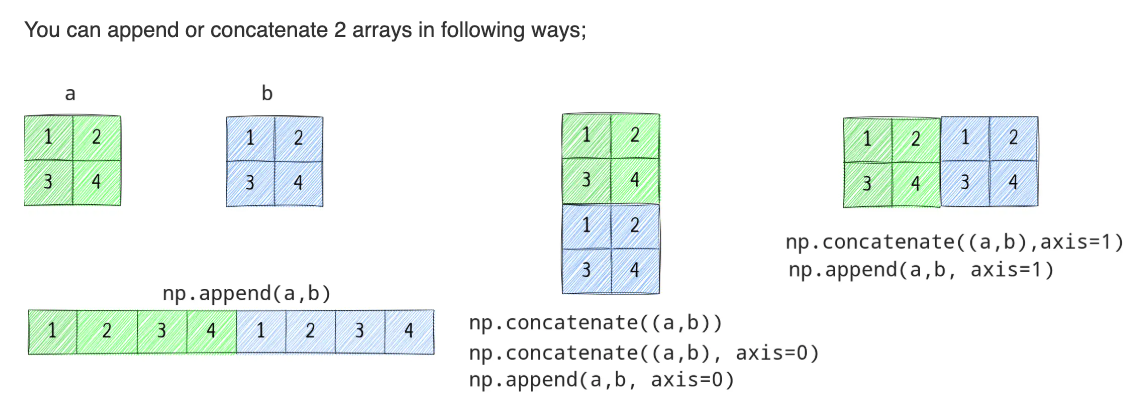

    Source: https://solothought.com/tutorial/python-numpy/

In [123]:
# load dataset

lending_co_data_numeric = np.loadtxt("Lending-company-Numeric.csv", delimiter = ',') 
lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [124]:
# The concatenated array has the same number of dimensions as the inputs

np.concatenate((lending_co_data_numeric[0,:], lending_co_data_numeric[1,:]))

array([ 2000.,    40.,   365.,  3121.,  4241., 13621.,  2000.,    40.,
         365.,  3061.,  4171., 15041.])

In [125]:
# let's see how concatenation works for 2 arrays
# create another 2-D array

#Recall: 
    
lending_co_data_numeric_NAN = np.genfromtxt("Lending-company-Numeric-NAN.csv", delimiter = ';')

temporary_fill = np.nanmax(lending_co_data_numeric_NAN).round(2) + 1
temporary_mean = np.nanmean(lending_co_data_numeric_NAN, axis = 0).round(2)

lending_co_data_numeric_NAN = np.genfromtxt("Lending-company-Numeric-NAN.csv",
                                            delimiter = ';', 
                                            filling_values = temporary_fill)

for i in range(lending_co_data_numeric_NAN.shape[1]):        
    lending_co_data_numeric_NAN[:,i] = np.where(lending_co_data_numeric_NAN[:,i] == temporary_fill,
                                                temporary_mean[i],
                                                lending_co_data_numeric_NAN[:,i])
    
lending_co_data_numeric_NAN

array([[ 2000.  ,    40.  ,   365.  ,  3121.  ,  4241.  , 13621.  ],
       [ 2000.  ,    40.  ,   365.  ,  3061.  ,  4171.  , 15041.  ],
       [ 1000.  ,    40.  ,   365.  ,  2160.  ,  3280.  , 15340.  ],
       ...,
       [ 2250.25,    40.  ,   365.  ,  4201.  ,  5001.  , 16600.  ],
       [ 1000.  ,    40.  ,   365.  ,  2080.  ,  3320.  , 15600.  ],
       [ 2000.  ,    40.  ,   365.  ,  4601.  ,  4601.  , 16600.  ]])

In [126]:
# concatenate old and new dataset

np.concatenate((lending_co_data_numeric, lending_co_data_numeric_NAN))

# we've concatenated second dataset at bottom of first
# check third lowest row, first column: identical with second dataset above

array([[ 2000.  ,    40.  ,   365.  ,  3121.  ,  4241.  , 13621.  ],
       [ 2000.  ,    40.  ,   365.  ,  3061.  ,  4171.  , 15041.  ],
       [ 1000.  ,    40.  ,   365.  ,  2160.  ,  3280.  , 15340.  ],
       ...,
       [ 2250.25,    40.  ,   365.  ,  4201.  ,  5001.  , 16600.  ],
       [ 1000.  ,    40.  ,   365.  ,  2080.  ,  3320.  , 15600.  ],
       [ 2000.  ,    40.  ,   365.  ,  4601.  ,  4601.  , 16600.  ]])

In [127]:
# we can check by calling .shape attribute: indeed 2x1043 = 2086 rows

np.concatenate((lending_co_data_numeric, lending_co_data_numeric_NAN)).shape

(2086, 6)

In [128]:
# we can also concatenate per dimension: along second axis = 1

np.concatenate((lending_co_data_numeric, lending_co_data_numeric_NAN), axis = 1)

array([[ 2000.,    40.,   365., ...,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365., ...,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365., ...,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365., ...,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365., ...,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365., ...,  4601.,  4601., 16600.]])

In [129]:
# horizontal concatenation: 6 rows + 6 rows wide

np.concatenate((lending_co_data_numeric, lending_co_data_numeric_NAN), axis = 1).shape

(1043, 12)

In [130]:
# we can also concatenate per dimension: along first axis = 0 : this is the default way of concatenating
# vertical: see above

np.concatenate((lending_co_data_numeric, lending_co_data_numeric_NAN), axis = 0)

array([[ 2000.  ,    40.  ,   365.  ,  3121.  ,  4241.  , 13621.  ],
       [ 2000.  ,    40.  ,   365.  ,  3061.  ,  4171.  , 15041.  ],
       [ 1000.  ,    40.  ,   365.  ,  2160.  ,  3280.  , 15340.  ],
       ...,
       [ 2250.25,    40.  ,   365.  ,  4201.  ,  5001.  , 16600.  ],
       [ 1000.  ,    40.  ,   365.  ,  2080.  ,  3320.  , 15600.  ],
       [ 2000.  ,    40.  ,   365.  ,  4601.  ,  4601.  , 16600.  ]])

In [131]:
np.concatenate((lending_co_data_numeric, lending_co_data_numeric_NAN), axis = 0).shape

(2086, 6)

In [132]:
# what happens in higher dimensions?
# We create 3-D arrays to showcase concatenate vs stacking

array_example_1 = np.array([[[1,2,3,4],[5,6,7,8],[9,10,11,12]],[[21,22,23,24],[25,26,27,28],[29,30,31,32]]])
array_example_2 = array_example_1 * 2

In [133]:
np.concatenate((array_example_1, array_example_2), axis = 0) 
# same as = vstack((array_example_1, array_example_2))

# np.concatenate((array_example_1, array_example_2), axis = 1) 
# same as = hstack((array_example_1, array_example_2))



array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[21, 22, 23, 24],
        [25, 26, 27, 28],
        [29, 30, 31, 32]],

       [[ 2,  4,  6,  8],
        [10, 12, 14, 16],
        [18, 20, 22, 24]],

       [[42, 44, 46, 48],
        [50, 52, 54, 56],
        [58, 60, 62, 64]]])

In [134]:
# same as = np.vstack((array_example_1, array_example_2))

np.vstack((array_example_1, array_example_2)) 

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[21, 22, 23, 24],
        [25, 26, 27, 28],
        [29, 30, 31, 32]],

       [[ 2,  4,  6,  8],
        [10, 12, 14, 16],
        [18, 20, 22, 24]],

       [[42, 44, 46, 48],
        [50, 52, 54, 56],
        [58, 60, 62, 64]]])

In [135]:
np.concatenate((array_example_1, array_example_2), axis = 1) 

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [ 2,  4,  6,  8],
        [10, 12, 14, 16],
        [18, 20, 22, 24]],

       [[21, 22, 23, 24],
        [25, 26, 27, 28],
        [29, 30, 31, 32],
        [42, 44, 46, 48],
        [50, 52, 54, 56],
        [58, 60, 62, 64]]])

In [136]:
# same as = np.hstack((array_example_1, array_example_2))

np.hstack((array_example_1, array_example_2)) 

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [ 2,  4,  6,  8],
        [10, 12, 14, 16],
        [18, 20, 22, 24]],

       [[21, 22, 23, 24],
        [25, 26, 27, 28],
        [29, 30, 31, 32],
        [42, 44, 46, 48],
        [50, 52, 54, 56],
        [58, 60, 62, 64]]])

In [137]:
# and what happens when we set axis = 2?
np.concatenate((array_example_1, array_example_2), axis = 2)

array([[[ 1,  2,  3,  4,  2,  4,  6,  8],
        [ 5,  6,  7,  8, 10, 12, 14, 16],
        [ 9, 10, 11, 12, 18, 20, 22, 24]],

       [[21, 22, 23, 24, 42, 44, 46, 48],
        [25, 26, 27, 28, 50, 52, 54, 56],
        [29, 30, 31, 32, 58, 60, 62, 64]]])

In [138]:
# again same as = np.dstack((array_example_1, array_example_2))

np.dstack((array_example_1, array_example_2))

array([[[ 1,  2,  3,  4,  2,  4,  6,  8],
        [ 5,  6,  7,  8, 10, 12, 14, 16],
        [ 9, 10, 11, 12, 18, 20, 22, 24]],

       [[21, 22, 23, 24, 42, 44, 46, 48],
        [25, 26, 27, 28, 50, 52, 54, 56],
        [29, 30, 31, 32, 58, 60, 62, 64]]])

So, np.concatenate can replicate the 3 stacking functions

In [139]:
# what if inputs have same dimension but different shapes/elements
# unlike stacking this is possible

np.concatenate((lending_co_data_numeric[0,:], lending_co_data_numeric[:,0]))

array([2000.,   40.,  365., ..., 2000., 1000., 2000.])

## 11. Unique Values

    np.unique() takes array as input
    returns array with all unique values of first array

In [140]:
# load dataset

lending_co_data_numeric = np.loadtxt("Lending-company-Numeric.csv", delimiter = ',') 
lending_co_data_numeric

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [141]:
# unique values of whole array sorted from low to high

np.unique(lending_co_data_numeric)

array([-2870., -2550., -2450., ..., 52751., 54625., 64001.])

In [142]:
# unique values of second column array sorted from low to high

np.unique(lending_co_data_numeric[:,1])

array([ 35.,  40.,  50., 125., 165.])

In [143]:
# if the values of the array are text, the unique function sorts them in "alphabetical" order by their ASCII codes. 

array_example = np.array(["a1", "a3","A1","A3","A3","AA1","B1","A2","B1","A2","B2","B2", "B3","a2","a3","B3","B3","a3" ])
np.unique(array_example)


array(['A1', 'A2', 'A3', 'AA1', 'B1', 'B2', 'B3', 'a1', 'a2', 'a3'],
      dtype='<U3')

In [144]:
# Unique -> returns the unique values within the array in increasing order
# return_counts -> returns how many times each unique value appears in the array
# return_index -> returns the index of the first encounter with each unique value

np.unique(lending_co_data_numeric[:,1], return_counts = True, return_index = True)
# confusingly index is 2nd array in results

(array([ 35.,  40.,  50., 125., 165.]),
 array([327,   0,   4,  19,  27]),
 array([  4, 567, 451,  19,   2]))